Importing relavent packages for the project

In [85]:
import numpy as py
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

**Creating initial dataframes**

**Movie Character Dataframe**

In [86]:
column_names = ['chId', 'chName', 'mId', 'mName', 'gender', 'posCredits']
characters_df = pd.read_csv('movie_characters_metadata.tsv', sep='\t', header=None, names=column_names, on_bad_lines='skip')
characters_df.head()


,chId,chName,mId,mName,gender,posCredits
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [87]:
print(characters_df.shape)
print(characters_df.info())

(9034, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9034 entries, 0 to 9033
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chId        9034 non-null   object
 1   chName      9015 non-null   object
 2   mId         9017 non-null   object
 3   mName       9017 non-null   object
 4   gender      9017 non-null   object
 5   posCredits  9017 non-null   object
dtypes: object(6)
memory usage: 423.6+ KB
None


In [88]:
nan_percentage = (characters_df.isna().mean() * 100).round(2)
print(nan_percentage)

chId          0.00
chName        0.21
mId           0.19
mName         0.19
gender        0.19
posCredits    0.19
dtype: float64


In [89]:
# Remove rows with NaN values
characters_df = characters_df.dropna()

In [90]:
# Remove duplicate rows
duplicate_counts = characters_df.duplicated().sum()
print("Total duplicate", duplicate_counts)
if duplicate_counts > 0:
  characters_df = characters_df.drop_duplicates()

Total duplicate 0


Cleansing Column Gender

In [91]:
characters_df.gender.value_counts()

?    6006
m    1899
f     921
M     145
F      44
Name: gender, dtype: int64

In [92]:
characters_df = characters_df[characters_df.gender != '?']
characters_df.gender = characters_df.gender.apply(lambda g: 'M' if g in ['m', 'M'] else 'F')
characters_df.gender.value_counts()

M    2044
F     965
Name: gender, dtype: int64

Cleansing Column posCredits

In [93]:
non_numeric_count = pd.to_numeric(characters_df['posCredits'], errors='coerce').isna().sum()
# Display the total count of non-numeric values
print("Total count of non-numeric values in 'posCredits' removed {}".format(non_numeric_count))

# Remove rows with non-numeric values in the specified column
characters_df = characters_df[pd.to_numeric(characters_df['posCredits'], errors='coerce').notna()]

Total count of non-numeric values in 'posCredits' removed 330


**Movie title Dataframe**

In [94]:
column_names = ['mId', 'mName', 'mYear', 'mRating', 'mVotes', 'mGenre']
titles_df = pd.read_csv('movie_titles_metadata.tsv', sep='\t', names=column_names, header=None, on_bad_lines='skip')
titles_df.head()

,mId,mName,mYear,mRating,mVotes,mGenre
0,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
2,m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
3,m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
4,m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']


In [95]:
print(titles_df.shape)
print(titles_df.info())


(617, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mId      617 non-null    object 
 1   mName    616 non-null    object 
 2   mYear    616 non-null    object 
 3   mRating  616 non-null    float64
 4   mVotes   616 non-null    float64
 5   mGenre   616 non-null    object 
dtypes: float64(2), object(4)
memory usage: 29.0+ KB
None


Removing rows with NAN

In [96]:
nan_percentage = (titles_df.isna().mean() * 100).round(2)
print(nan_percentage)

mId        0.00
mName      0.16
mYear      0.16
mRating    0.16
mVotes     0.16
mGenre     0.16
dtype: float64


In [97]:
# Remove rows with NaN values
titles_df = titles_df.dropna()

In [98]:
# Remove duplicate rows
duplicate_counts = titles_df.duplicated().sum()
print("Total Number of duplicate rows", duplicate_counts)
if duplicate_counts > 0:
  titles_df = titles_df.drop_duplicates()

Total Number of duplicate rows 0


No outier data found in numeric columns

In [99]:
titles_df.describe()

,mRating,mVotes
count,616.000000,616.000000
mean,6.865584,49901.698052
std,1.215463,61898.367352
min,2.500000,9.000000
25%,6.200000,9992.500000
50%,7.000000,27121.500000
75%,7.800000,66890.000000
max,9.300000,419312.000000


Extracting the year part from the column mYear

In [100]:
column_name = 'mYear'

# Filter non-numeric values in the specified column
non_numeric_values = titles_df.loc[~pd.to_numeric(titles_df[column_name], errors='coerce').notna(), column_name]

# Get unique non-numeric values
unique_non_numeric_values = non_numeric_values.unique()

# Display the unique non-numeric values
print("Unique non-numeric values in column '{}':".format(column_name))
print(unique_non_numeric_values)

Unique non-numeric values in column 'mYear':
['1989/I' '1990/I' '1995/I' '1998/I' '2004/I' '2007/I' '1992/I' '2005/I'
 '2002/I' '1968/I' '1996/I' '2000/I' '2009/I' '2003/I']


In [101]:
column_name = 'mYear'

# Extract numeric portion using regular expression
titles_df[column_name] = titles_df[column_name].str.extract('(\d+)', expand=False)
titles_df[column_name] = titles_df[column_name].astype(int)


In [102]:
titles_df.head()

,mId,mName,mYear,mRating,mVotes,mGenre
0,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
2,m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
3,m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
4,m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']


Movie Lines

In [103]:
column_names = ['lId', 'chId', 'mId', 'chName', 'chLine']
lines_df = pd.read_csv('movie_lines.tsv', sep='\t', header=None,names=column_names, on_bad_lines='skip')
lines_df.head()

,lId,chId,mId,chName,chLine
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [104]:
print(lines_df.shape)
print(lines_df.info())

(293202, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293202 entries, 0 to 293201
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   lId     293202 non-null  object
 1   chId    288917 non-null  object
 2   mId     288917 non-null  object
 3   chName  288874 non-null  object
 4   chLine  288663 non-null  object
dtypes: object(5)
memory usage: 11.2+ MB
None


In [105]:
nan_percentage = (lines_df.isna().mean() * 100).round(2)
print(nan_percentage)

lId       0.00
chId      1.46
mId       1.46
chName    1.48
chLine    1.55
dtype: float64


In [106]:
lines_df = lines_df.dropna()

In [107]:
# Remove duplicate rows
duplicate_counts = lines_df.duplicated().sum()
print("Total duplicates: ",duplicate_counts)
if duplicate_counts > 0:
  lines_df = lines_df.drop_duplicates()

Total duplicates:  0


In [108]:
print(lines_df.shape)

(288620, 5)


In [109]:
column_names = ['chId1', 'chId2','mId', 'lineList']
conversations_df = pd.read_csv('movie_conversations.tsv', sep='\t',names=column_names, header=None, on_bad_lines='skip')
conversations_df.head()

,chId1,chId2,mId,lineList
0,u0,u2,m0,['L194' 'L195' 'L196' 'L197']
1,u0,u2,m0,['L198' 'L199']
2,u0,u2,m0,['L200' 'L201' 'L202' 'L203']
3,u0,u2,m0,['L204' 'L205' 'L206']
4,u0,u2,m0,['L207' 'L208']


In [110]:
nan_percentage = (conversations_df.isna().mean() * 100).round(2)
print(nan_percentage)

chId1       0.0
chId2       0.0
mId         0.0
lineList    0.0
dtype: float64


In [111]:
# Remove duplicate rows
duplicate_counts = lines_df.duplicated().sum()
print("Total Number Of Duplicates: ", duplicate_counts)
if duplicate_counts > 0:
  lines_df = lines_df.drop_duplicates()

Total Number Of Duplicates:  0


In [112]:
conversations_df.shape

(83097, 4)

In [113]:
conversations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83097 entries, 0 to 83096
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   chId1     83097 non-null  object
 1   chId2     83097 non-null  object
 2   mId       83097 non-null  object
 3   lineList  83097 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [114]:
column_names = ['mId','mName','url']
rawScript_df = pd.read_csv('raw_script_urls.tsv', sep='\t', names=column_names, header=None,on_bad_lines='skip')
rawScript_df.head()

,mId,mName,url
0,m0,10 things i hate about you,http://www.dailyscript.com/scripts/10Things.html
1,m1,1492: conquest of paradise,http://www.hundland.org/scripts/1492-ConquestO...
2,m2,15 minutes,http://www.dailyscript.com/scripts/15minutes.html
3,m3,2001: a space odyssey,http://www.scifiscripts.com/scripts/2001.txt
4,m4,48 hrs.,http://www.awesomefilm.com/script/48hours.txt


In [115]:
rawScript_df.shape

(617, 3)

In [116]:
nan_percentage = (rawScript_df.isna().mean() * 100).round(2)
print(nan_percentage)

mId      0.00
mName    0.16
url      0.16
dtype: float64


In [117]:
# Remove rows with NaN values
rawScript_df = rawScript_df.dropna()

In [118]:
# Remove duplicate rows
duplicate_counts = rawScript_df.duplicated().sum()
print("Total Number Of Duplicates: ", duplicate_counts)
if duplicate_counts > 0:
  rawScript_df = rawScript_df.drop_duplicates()

Total Number Of Duplicates:  0


In [119]:
rawScript_df.shape

(616, 3)

In [120]:
# Display the column names in titles_df
print(titles_df.columns)

Index(['mId', 'mName', 'mYear', 'mRating', 'mVotes', 'mGenre'], dtype='object')


Here are the list of initial dataframes:
1. characters_df
2. titles_df
3. conversations_df
4. rawScript_df
5. lines_df

In [121]:
# Combine characters_df and lines_df on 'chId'
merged_characters_lines = pd.merge(characters_df, lines_df, on='chId', how='inner')


In [122]:
# Display the column names in merged_characters_lines dataframe
print(merged_characters_lines.columns)

# Display the column names in titles_df dataframe
print(titles_df.columns)


Index(['chId', 'chName_x', 'mId_x', 'mName', 'gender', 'posCredits', 'lId',
       'mId_y', 'chName_y', 'chLine'],
      dtype='object')
Index(['mId', 'mName', 'mYear', 'mRating', 'mVotes', 'mGenre'], dtype='object')


 merge the dataframes based on the 'mId' column.

In [123]:
# Combine merged_characters_lines with titles_df on 'mId'
merged_characters_lines_titles = pd.merge(merged_characters_lines, titles_df, left_on='mId_x', right_on='mId', how='inner')


In [124]:
# Display basic statistics
print(merged_characters_lines_titles.describe())

# Explore the distribution of categorical variables
print(merged_characters_lines_titles['gender'].value_counts())


               mYear        mRating         mVotes
count  204835.000000  204835.000000  204835.000000
mean     1987.687470       7.034224   51097.694369
std        17.495695       1.106257   58857.200057
min      1931.000000       2.500000      26.000000
25%      1984.000000       6.400000   13878.000000
50%      1995.000000       7.200000   29358.000000
75%      1999.000000       7.900000   70349.000000
max      2009.000000       9.200000  419312.000000
M    143274
F     61561
Name: gender, dtype: int64


mYear (Movie Year):

The dataset contains information on movies ranging from 1931 to 2009.
The average (mean) movie year is approximately 1987, with a standard deviation of around 17.5 years.
The earliest movie in the dataset is from 1931.

mRating (Movie Rating):

The movie ratings range from a minimum of 2.5 to a maximum of 9.2.
The average (mean) movie rating is approximately 7.03, with a standard deviation of around 1.11.
The 25th percentile of movie ratings is 6.4, and the 75th percentile is 7.9.

mVotes (Number of Votes):

The number of votes for movies ranges from a minimum of 26 to a maximum of 419,312.
The average (mean) number of votes is approximately 51,097, with a standard deviation of around 58,857.
The 25th percentile of the number of votes is 13,878, and the 75th percentile is 70,349.

Gender Distribution:

There are two genders labeled in the dataset: Male (M) and Female (F).
The count indicates that there are 143,274 movies with a male gender label and 61,561 movies with a female gender label.

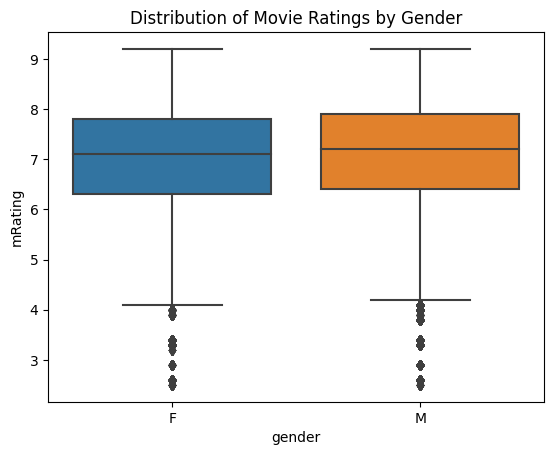

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Distribution of movie ratings by gender
sns.boxplot(x='gender', y='mRating', data=merged_characters_lines_titles)
plt.title('Distribution of Movie Ratings by Gender')
plt.show()


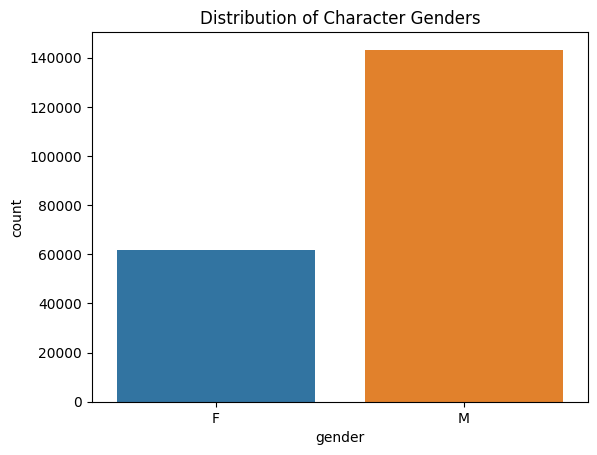

In [126]:
# Explore the distribution of character genders
sns.countplot(x='gender', data=merged_characters_lines_titles)
plt.title('Distribution of Character Genders')
plt.show()


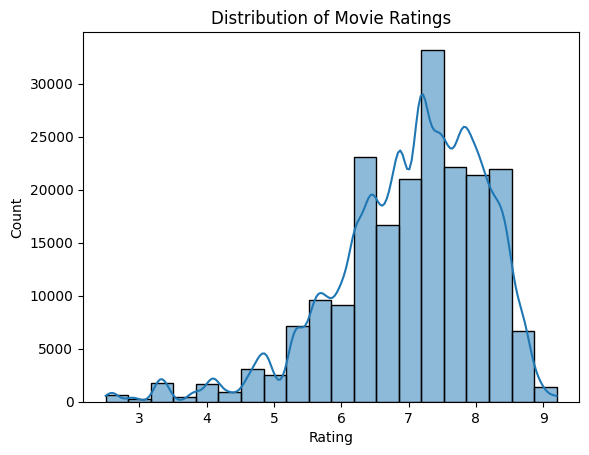

In [127]:
# Explore the distribution of movie ratings
sns.histplot(x='mRating', data=merged_characters_lines_titles, bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.show()


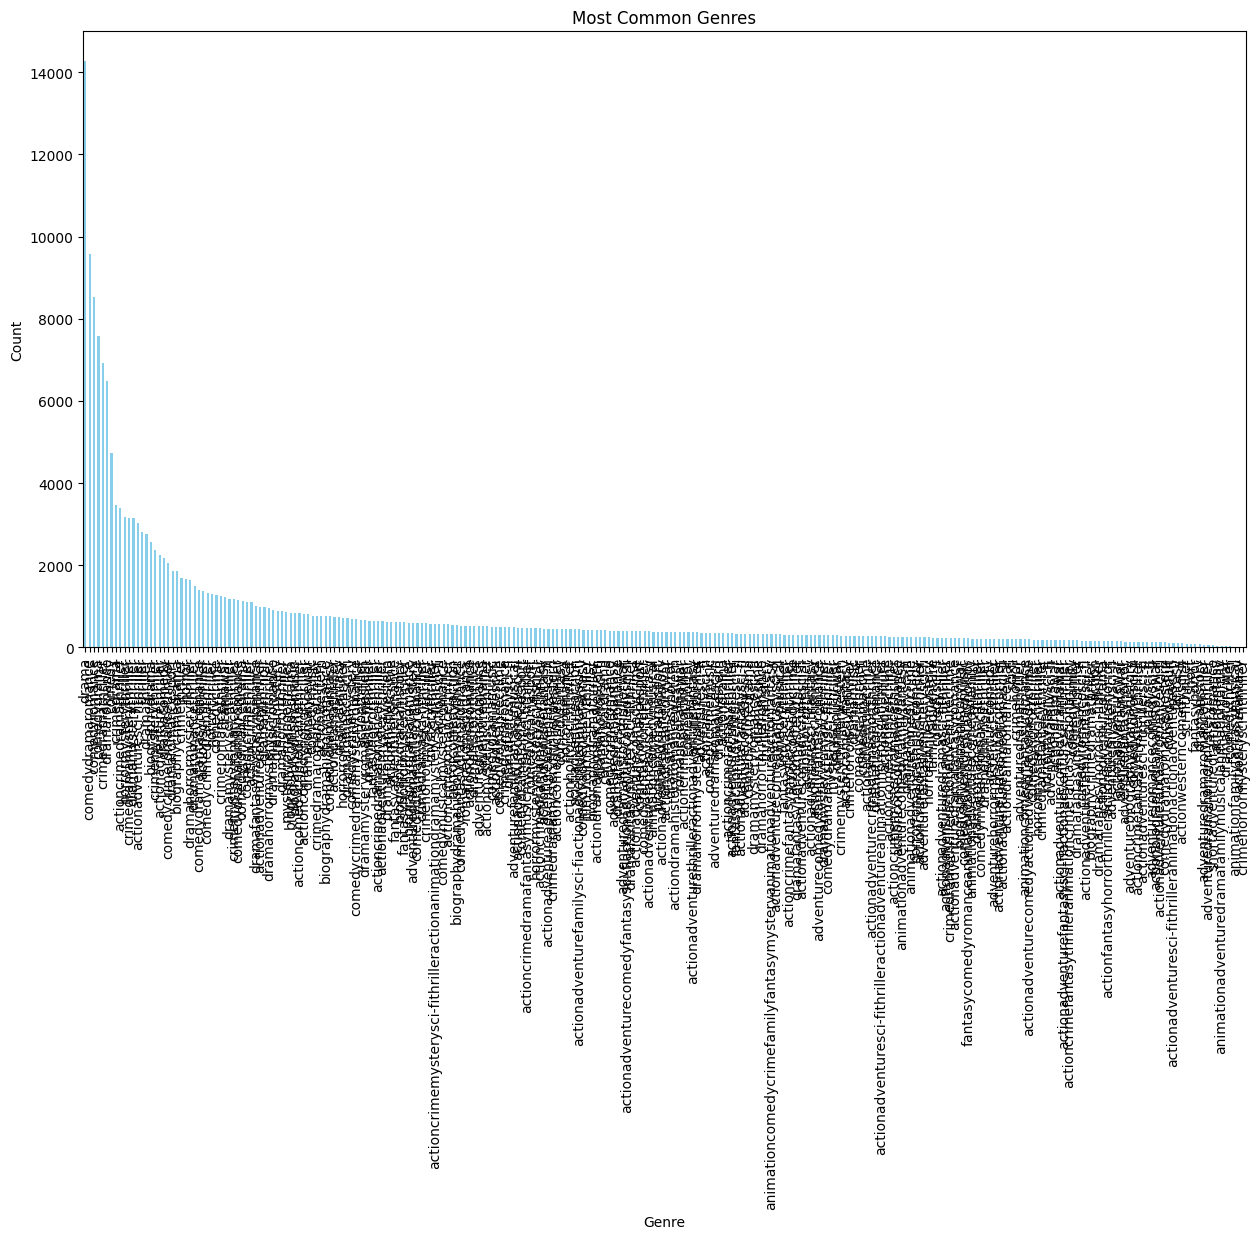

In [128]:
# Increase the figure size for better visibility
plt.figure(figsize=(15, 8))

# Plotting the most common genres with a larger figure size
common_genres.plot(kind='bar', color='skyblue')
plt.title('Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


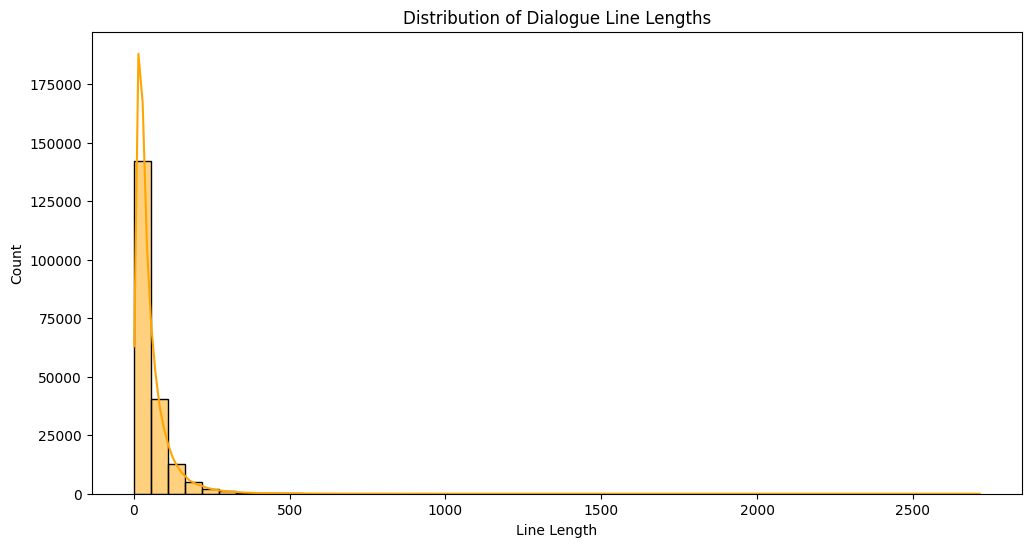

In [129]:
# Calculate the length of each dialogue line
merged_characters_lines_titles['line_length'] = merged_characters_lines_titles['chLine'].apply(lambda x: len(str(x)))

# Histogram of dialogue line lengths
plt.figure(figsize=(12, 6))
sns.histplot(x='line_length', data=merged_characters_lines_titles, bins=50, kde=True, color='orange')
plt.title('Distribution of Dialogue Line Lengths')
plt.xlabel('Line Length')
plt.ylabel('Count')
plt.show()


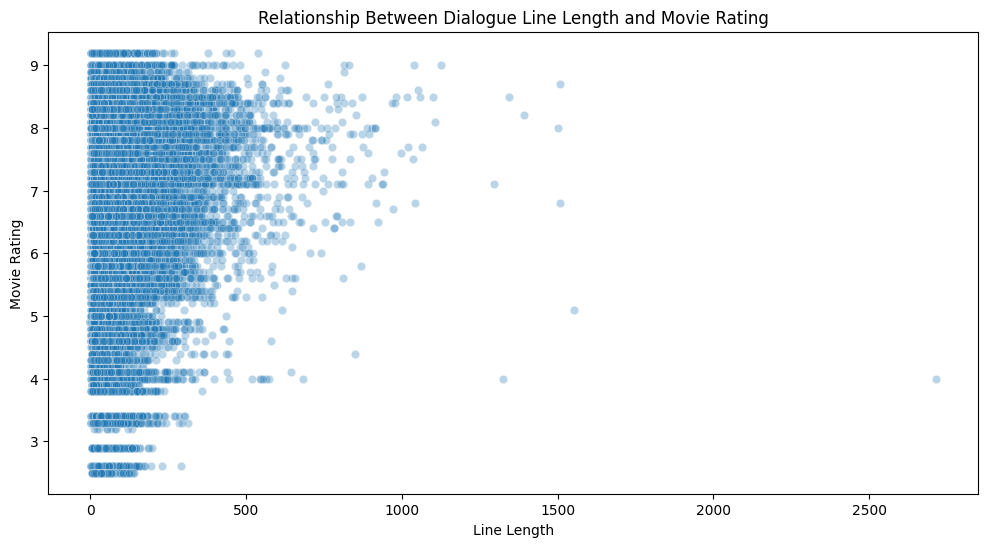

In [130]:
# Scatter plot to visualize the relationship between line length and movie rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='line_length', y='mRating', data=merged_characters_lines_titles, alpha=0.3)
plt.title('Relationship Between Dialogue Line Length and Movie Rating')
plt.xlabel('Line Length')
plt.ylabel('Movie Rating')
plt.show()


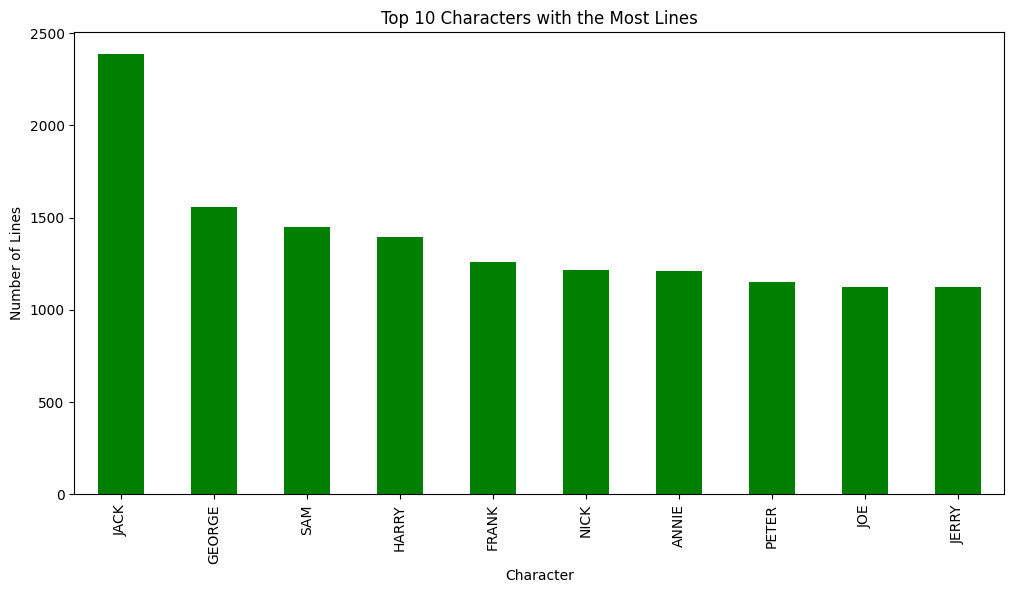

In [131]:
# Count the number of lines each character has
character_line_counts = merged_characters_lines_titles['chName_x'].value_counts()

# Plotting the top 10 characters with the most lines
plt.figure(figsize=(12, 6))
character_line_counts.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Characters with the Most Lines')
plt.xlabel('Character')
plt.ylabel('Number of Lines')
plt.show()


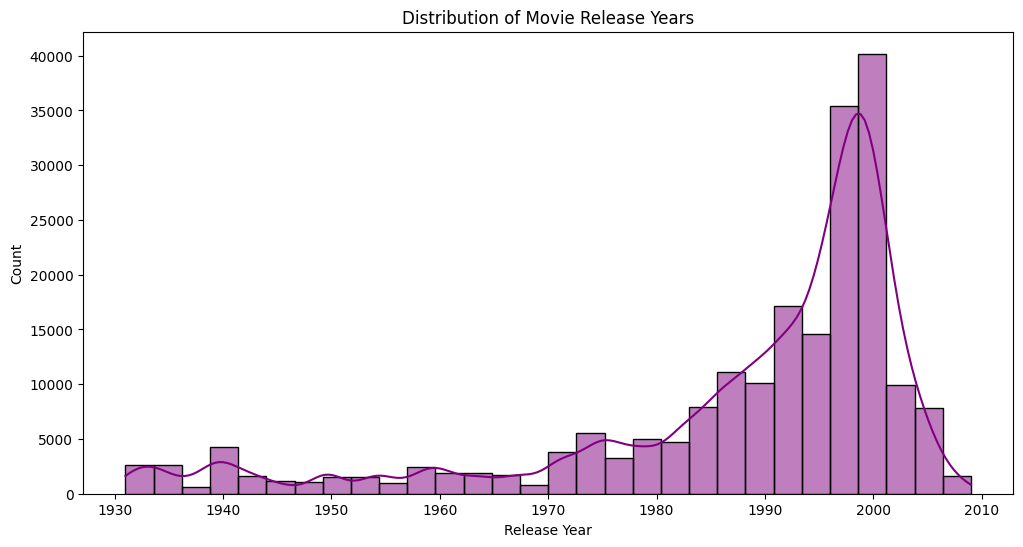

In [132]:
# Histogram of movie release years
plt.figure(figsize=(12, 6))
sns.histplot(x='mYear', data=merged_characters_lines_titles, bins=30, kde=True, color='purple')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


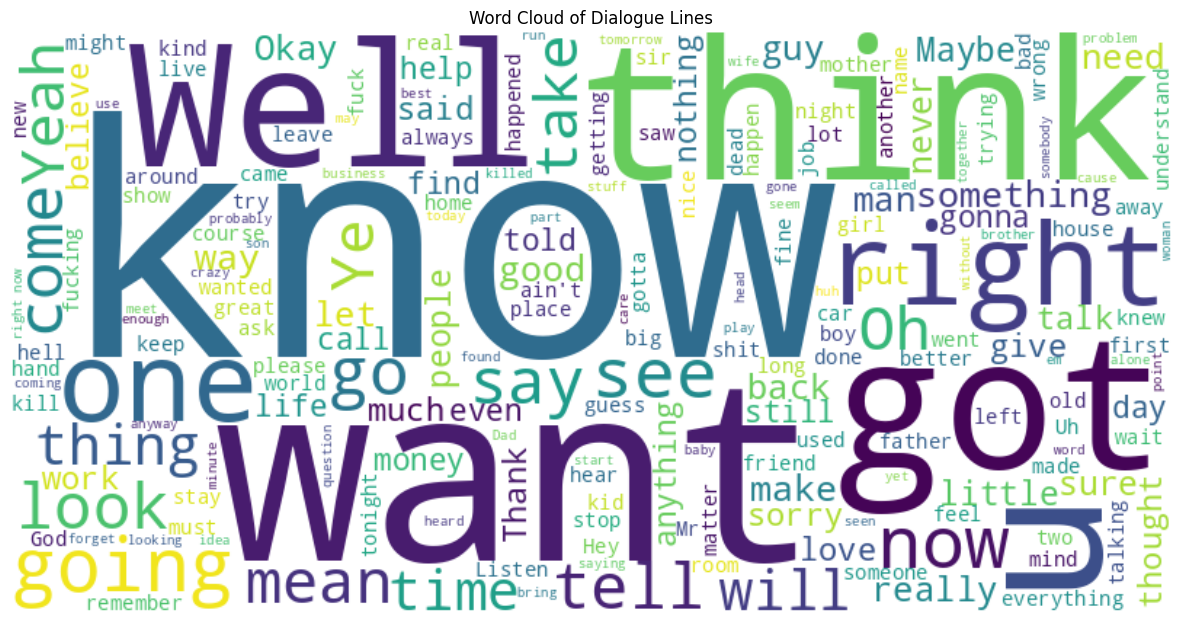

In [133]:
from wordcloud import WordCloud

# Concatenate all dialogue lines
all_lines = ' '.join(merged_characters_lines_titles['chLine'])

# Create a word cloud with larger figure size
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lines)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Dialogue Lines')
plt.show()


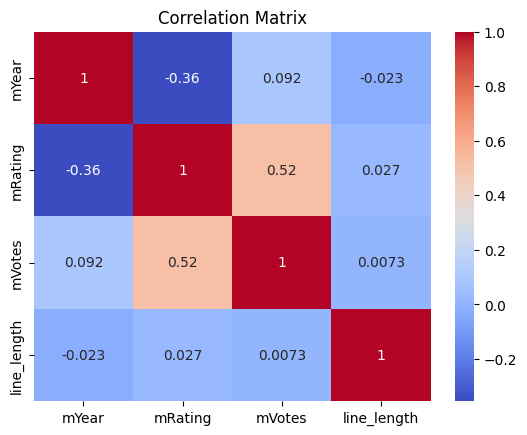

In [134]:
# Example: Correlation matrix
correlation_matrix = merged_characters_lines_titles.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [135]:
merged_characters_lines_titles.head()

,chId,chName_x,mId_x,mName_x,gender,posCredits,lId,mId_y,chName_y,chLine,mId,mName_y,mYear,mRating,mVotes,mGenre,line_length
0,u0,BIANCA,m0,10 things i hate about you,F,4,L1045,m0,BIANCA,They do not!,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],12
1,u0,BIANCA,m0,10 things i hate about you,F,4,L985,m0,BIANCA,I hope so.,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],10
2,u0,BIANCA,m0,10 things i hate about you,F,4,L925,m0,BIANCA,Let's go.,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],9
3,u0,BIANCA,m0,10 things i hate about you,F,4,L872,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],46
4,u0,BIANCA,m0,10 things i hate about you,F,4,L869,m0,BIANCA,Like my fear of wearing pastels?,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance'],32
